In [1]:
import pandas as pd
import pandas.io.data as web
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as scs
%matplotlib inline

In [2]:
def print_statistics(array):
    sta=scs.describe(array)
    print ' %14s %15s ' %(' statistics ' ,' value' )
    print 30* '-'
    print ' %14s %15f ' %('size  ' ,sta[0] )
    print ' %14s %15f ' %('min  ' , sta[1][0])
    print ' %14s %15f ' %(' max ' ,sta[1][1] )
    print ' %14s %15f ' %(' mean ' ,sta[2] )
    print ' %14s %15f ' %('  std' ,np.sqrt(sta[3]) )
    print ' %14s %15f ' %(' skew ' ,sta[4] )
    print ' %14s %15f ' %('  kurtosis' , sta[5])

In [3]:
def normality_tests(arr):
    '''Tests	for	normality	distribution	of	given	data	set.
Parameters
array:	ndarray
object	to	generate	statistics	on
    '''
    print ' Skew of data set %14.3f' %scs.skew(arr)
    print ' Skew test p-value  %14.3f' %scs.skewtest(arr)[1]
    print '  kurt of data set %14.3f' %scs.kurtosis(arr)
    print '  kurt test p-value %14.3f' %scs.kurtosistest(arr)[1]
    print '  Norm test p-values %14.3f' %scs.normaltest(arr)[1]
   

In [4]:
symbols=['^GSPC','XOM','CAT','MSFT']

In [5]:
data=pd.DataFrame()

In [6]:
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo',start='1/1/2015')['Adj Close']
    
data = data.dropna()

In [7]:
data[:5]

,^GSPC,XOM,CAT,MSFT
Date,,,,
2015-01-02,2058.199951,90.533594,89.556707,45.827578
2015-01-05,2020.579956,88.056427,84.829346,45.406156
2015-01-06,2002.609985,87.588298,84.283509,44.739715
2015-01-07,2025.900024,88.475790,85.589622,45.308148
2015-01-08,2062.139893,89.948438,86.466866,46.641029


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2015-01-02 00:00:00 to 2015-10-16 00:00:00
Data columns (total 4 columns):
^GSPC    200 non-null float64
XOM      200 non-null float64
CAT      200 non-null float64
MSFT     200 non-null float64
dtypes: float64(4)

In [37]:
data.tail()

,^GSPC,XOM,CAT,MSFT
Date,,,,
2015-10-12,2017.459961,79.300003,70.500000,47.000000
2015-10-13,2003.689941,79.160004,70.169998,46.889999
2015-10-14,1994.239990,80.160004,70.709999,46.680000
2015-10-15,2023.859985,81.480003,70.830002,47.009998
2015-10-16,2033.109985,82.480003,69.680000,47.509998


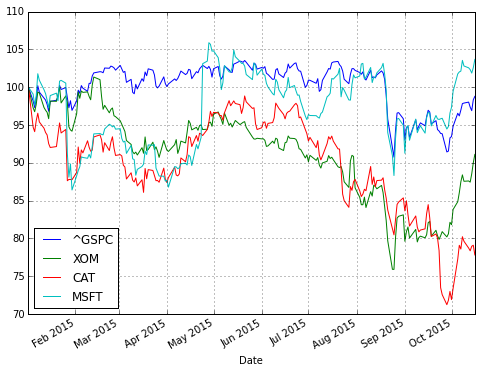

In [38]:
(data / data.ix[0] * 100).plot(figsize=(8, 6))

In [39]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,^GSPC,XOM,CAT,MSFT
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018447,-0.027743,-0.054230,-0.009238
2015-01-06,-0.008933,-0.005330,-0.006455,-0.014786
2015-01-07,0.011563,0.010082,0.015378,0.012625
2015-01-08,0.017730,0.016508,0.010197,0.028994


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11F2B430>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121AA0D0>]], dtype=object)

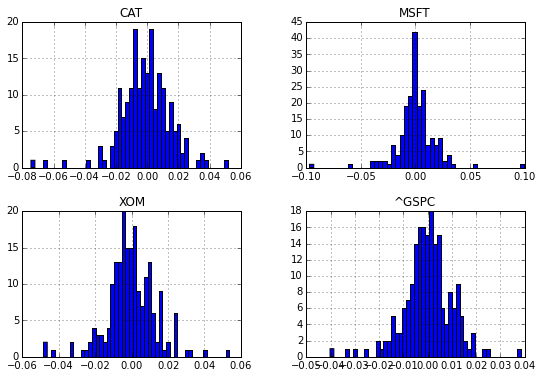

In [40]:
log_returns.hist(bins=50, figsize=(9, 6))

In [41]:
log_returns.describe()

,^GSPC,XOM,CAT,MSFT
count,199.000000,199.000000,199.000000,199.000000
mean,-0.000062,-0.000468,-0.001261,0.000181
std,0.009898,0.013425,0.015949,0.017575
min,-0.040211,-0.048430,-0.074546,-0.097099
25%,-0.004613,-0.007090,-0.010306,-0.007069
50%,-0.000305,-0.001224,-0.001242,-0.000225
75%,0.005162,0.007226,0.007998,0.007447
max,0.038291,0.053692,0.051613,0.099413


In [42]:
for sym in symbols:
    print ' \n Results for symbols %s' %sym
    print 30*'-'
    log_data=np.array(log_returns[sym].dropna())
    print_statistics(log_data)

 
 Results for symbols ^GSPC
------------------------------
    statistics            value 
------------------------------
         size        199.000000 
          min         -0.040211 
           max         0.038291 
          mean        -0.000062 
            std        0.009898 
          skew        -0.293375 
       kurtosis        2.384886 
 
 Results for symbols XOM
------------------------------
    statistics            value 
------------------------------
         size        199.000000 
          min         -0.048430 
           max         0.053692 
          mean        -0.000468 
            std        0.013425 
          skew        -0.071703 
       kurtosis        2.534060 
 
 Results for symbols CAT
------------------------------
    statistics            value 
------------------------------
         size        199.000000 
          min         -0.074546 
           max         0.051613 
          mean        -0.001261 
            std        0.015949 
     

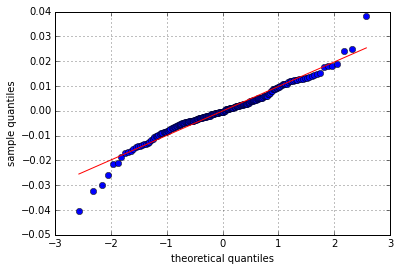

In [43]:
sm.qqplot(log_returns['^GSPC'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

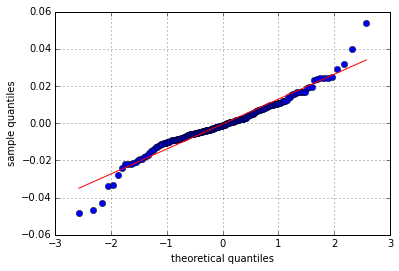

In [44]:
sm.qqplot(log_returns['XOM'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [36]:
def normality_tests(arr):
    '''Tests for normality distribution of given data set.
Parameters
==========
array: ndarray
object to generate statistics on
'''
print 'Skew of data set %14.3' % scs.skew(arr)
print 'Skew test p-value %14.3f'% scs.skewtest(arr)[1]
print 'Kurt of data set %14.3f' % scs.kurtosis(arr)
print 'Kurt test p-value %14.3f'% scs.kurtosistest(arr)[1]

NameError: name 'arr' is not defined

In [37]:
for sym in symbols:
    print ' \nResults for symbol %s' %sym
    print 32*'-'
    log_data=np.array(log_returns[sym].dropna())
    normality_tests(log_data)

 
Results for symbol ^GSPC
--------------------------------


NameError: name 'log_returns' is not defined

In [47]:
Exxon_Mobil_CorporationXOM= web.DataReader('XOM',data_source='google',start='1/1/2000',end='10/9/2015')

In [48]:
Exxon_Mobil_CorporationXOM.head()

,Open,High,Low,Close,Volume
﻿Date,,,,,
2000-01-03,39.75,40.38,38.94,39.09,13455800
2000-01-04,38.69,39.09,38.25,38.41,14392000
2000-01-05,39.00,40.88,38.91,40.50,17485000
2000-01-06,40.31,42.91,40.09,42.59,19462000
2000-01-07,42.97,43.12,42.31,42.31,16514600


In [49]:
Exxon_Mobil_CorporationXOM.tail()

,Open,High,Low,Close,Volume
﻿Date,,,,,
2015-10-05,76.65,77.15,75.79,76.81,18486731
2015-10-06,76.96,78.56,76.26,77.89,18757917
2015-10-07,78.97,79.29,77.53,79.20,18703210
2015-10-08,79.31,80.11,78.54,80.03,14344692
2015-10-09,80.05,80.16,78.62,79.26,17384670


In [50]:
Exxon_Mobil_CorporationXOM['Log_Ret']=np.log(Exxon_Mobil_CorporationXOM['Close']/
    Exxon_Mobil_CorporationXOM['Close'].shift(1))

In [51]:
Exxon_Mobil_CorporationXOM['Volatility']=pd.rolling_std(Exxon_Mobil_CorporationXOM['Log_Ret'],
                                                        window=252)*np.sqrt(252)

In [52]:
Exxon_Mobil_CorporationXOM['Volatility']=pd.rolling_std(Exxon_Mobil_CorporationXOM['Log_Ret'],
                                                        window=252)*np.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x04D03870>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12AB6410>], dtype=object)

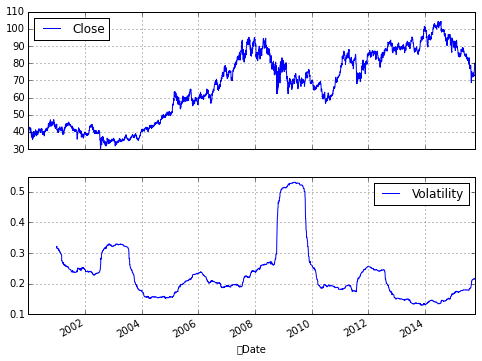

In [53]:
Exxon_Mobil_CorporationXOM[['Close','Volatility']].plot(subplots=True,color='blue', figsize=(8,6))

In [54]:
Exxon_Mobil_CorporationXOM['Log_Ret'].head()

﻿Date
2000-01-03         NaN
2000-01-04   -0.017549
2000-01-05    0.052984
2000-01-06    0.050318
2000-01-07   -0.006596
Name: Log_Ret, dtype: float64

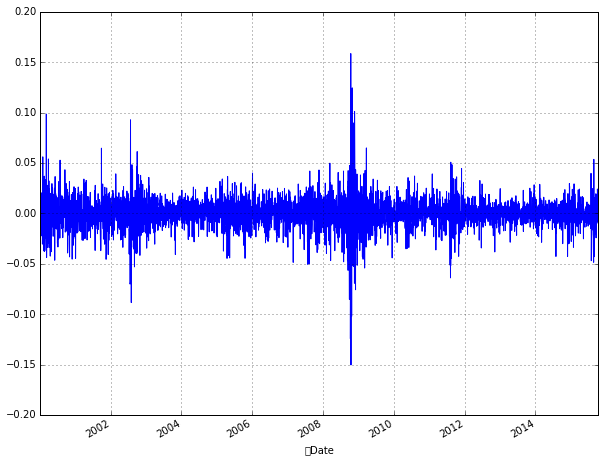

In [55]:
Exxon_Mobil_CorporationXOM['Log_Ret'].plot(figsize=(10,8))

In [56]:
sp500=web.DataReader('^GSPC',data_source='yahoo',start='1/1/2000')

In [57]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3973 entries, 2000-01-03 00:00:00 to 2015-10-16 00:00:00
Data columns (total 6 columns):
Open         3973 non-null float64
High         3973 non-null float64
Low          3973 non-null float64
Close        3973 non-null float64
Volume       3973 non-null int64
Adj Close    3973 non-null float64
dtypes: float64(5), int64(1)

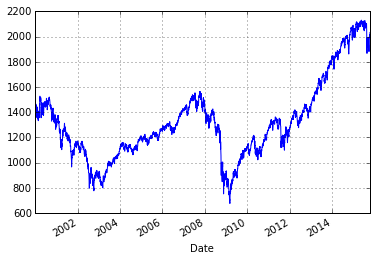

In [58]:
sp500['Close'].plot()

In [59]:
sp500['42d']=np.round(pd.rolling_mean(sp500['Close'],window=42),2)
sp500['252d']=np.round(pd.rolling_mean(sp500['Close'],window=252),2)

In [60]:
sp500[['Close','42d','252d',]].tail()

,Close,42d,252d
Date,,,
2015-10-12,2017.459961,1972.07,2051.43
2015-10-13,2003.689941,1970.17,2051.94
2015-10-14,1994.239990,1967.85,2052.40
2015-10-15,2023.859985,1965.98,2053.04
2015-10-16,2033.109985,1964.46,2053.72


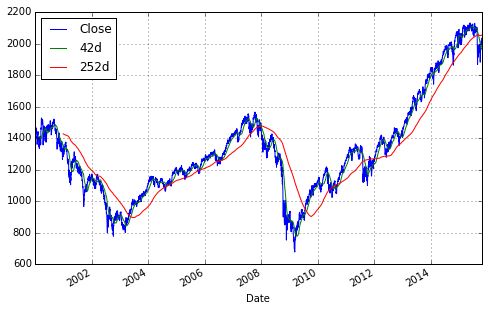

In [61]:
sp500[['Close','42d','252d',]].plot(grid=True,figsize=(8,5))

In [62]:
sp500['42-252'] = sp500['42d'] - sp500['252d']
sp500['42-252'].tail()

Date
2015-10-12   -79.36
2015-10-13   -81.77
2015-10-14   -84.55
2015-10-15   -87.06
2015-10-16   -89.26
Name: 42-252, dtype: float64

In [63]:
sp500['42-252'] = sp500['42d'] - sp500['252d']
sp500['42-252'].head()

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
Name: 42-252, dtype: float64

In [64]:
SD=50
sp500['Regime']=np.where(sp500['42-252']>SD,1,0)
sp500['Regime']=np.where(sp500['42-252']<SD,-1,sp500['Regime'])
sp500['Regime'].value_counts()

-1    1909
 1    1813
 0     251
dtype: int64

(-1.1, 1.1)

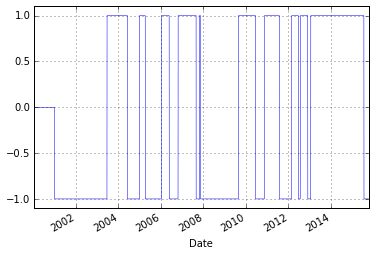

In [65]:
sp500['Regime'].plot(lw=0.5)
plt.ylim(-1.1,1.1)

In [66]:
sp500['Market']=np.log(sp500['Close'] / sp500['Close'].shift(1))

In [67]:
sp500['Strategy']=sp500['Regime'].shift(1)*sp500['Market']

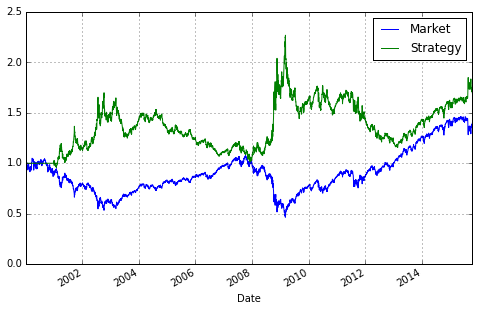

In [68]:
sp500[['Market','Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8,5))

In [69]:
DAX=web.DataReader(name='^GDAXI',data_source='yahoo',start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4025 entries, 2000-01-03 00:00:00 to 2015-10-16 00:00:00
Data columns (total 6 columns):
Open         4025 non-null float64
High         4025 non-null float64
Low          4025 non-null float64
Close        4025 non-null float64
Volume       4025 non-null int64
Adj Close    4025 non-null float64
dtypes: float64(5), int64(1)

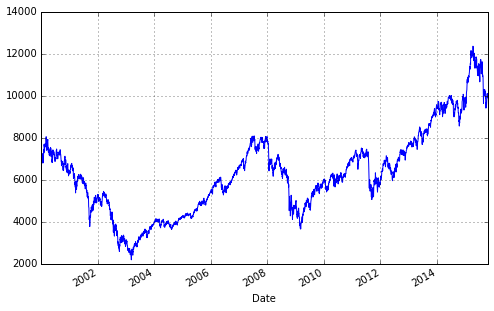

In [70]:
DAX['Close'].plot(figsize=(8,5))

In [71]:
%%time
DAX['Ret_Loop']=0.0
for i in range(1,len(DAX)):
    DAX['Ret_Loop'][i]=np.log(DAX['Close'][i]/(DAX['Close'])[i-1])

Wall time: 563 ms


In [72]:
DAX[['Close','Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2015-10-12,10119.830078,0.002298
2015-10-13,10032.820312,-0.008635
2015-10-14,9915.849609,-0.011727
2015-10-15,10064.799805,0.014910
2015-10-16,10104.429688,0.003930


In [73]:
%time 
DAX['Return']=np.log(DAX['Close']/DAX['Close'].shift(1))

Wall time: 0 ns


In [74]:
DAX[['Close','Ret_Loop','Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2015-10-12,10119.830078,0.002298,0.002298
2015-10-13,10032.820312,-0.008635,-0.008635
2015-10-14,9915.849609,-0.011727,-0.011727
2015-10-15,10064.799805,0.014910,0.014910
2015-10-16,10104.429688,0.003930,0.003930


array([<matplotlib.axes._subplots.AxesSubplot object at 0x14493990>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x14070090>], dtype=object)

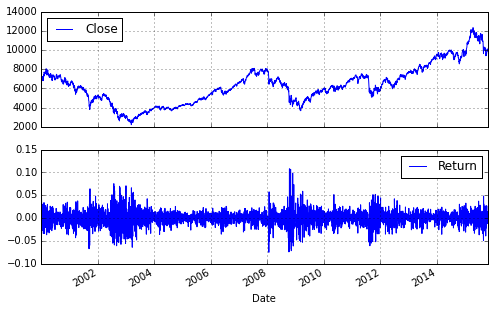

In [75]:
DAX[['Close','Return']].plot(subplots=True,style='b',figsize=(8,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x14493C10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x14C6AC10>], dtype=object)

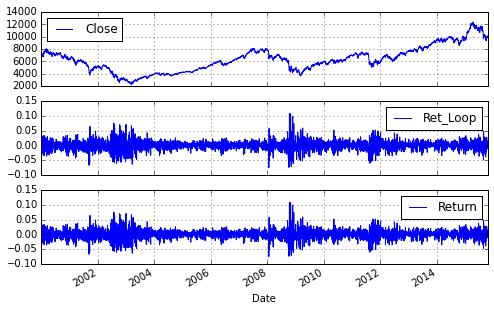

In [76]:
DAX[['Close','Ret_Loop','Return']].plot(subplots=True,style='b',figsize=(8,5))

In [77]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)

In [78]:
DAX[['Close','42d','252d']].tail()

,Close,42d,252d
Date,,,
2015-10-12,10119.830078,10063.320057,10686.968029
2015-10-13,10032.820312,10040.645787,10691.810849
2015-10-14,9915.849609,10016.253395,10696.138784
2015-10-15,10064.799805,9995.988630,10702.062791
2015-10-16,10104.429688,9982.233375,10708.100605


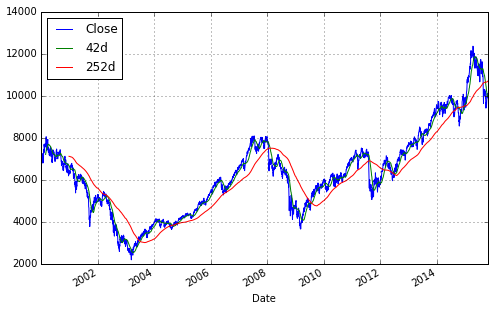

In [79]:
DAX[['Close','42d','252d']].plot(figsize=(8,5))

In [80]:
import math
DAX['Mov_Vol']=pd.rolling_std(DAX['Return'],window=252)*math.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x15064950>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1542DBD0>], dtype=object)

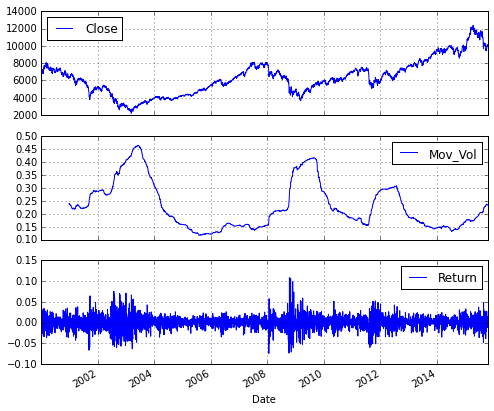

In [81]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7))

In [82]:
from IPython.display import Math
Math(r'N(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x} e^{-\frac{z^2}{2}}\, dz')

<IPython.core.display.Math object>

Gathering the EUROX STOXX 50 Index and VSTOXX data

In [83]:
from urllib import urlretrieve

In [84]:
url_path='http://www.stoxx.com/download/historical_values/'
stoxxeu600_url=url_path+'hbrbcpe.txt'
vstoxx_url=url_path+'h_vstoxx.txt'

In [85]:
data_folder='C:\Users\quantum\Documents\my-routine/' # Save file to local target destination.
stoxxeu600_filepath=data_folder+'stoxxeu600.txt'
vstoxx_filepath=data_folder+'vstoxx.txt'

In [86]:
urlretrieve(stoxxeu600_url,stoxxeu600_filepath)

('C:\\Users\\quantum\\Documents\\my-routine/stoxxeu600.txt',
 <httplib.HTTPMessage instance at 0x15535760>)

In [87]:
urlretrieve(vstoxx_url,vstoxx_filepath)

('C:\\Users\\quantum\\Documents\\my-routine/vstoxx.txt',
 <httplib.HTTPMessage instance at 0x14F32CB0>)

In [88]:
import os.path

In [89]:
os.path.isfile(stoxxeu600_filepath)

True

In [90]:
os.path.isfile(vstoxx_filepath)

True

In [91]:
with open(stoxxeu600_filepath,'r') as opened_file:
    for i in range(5):
        print opened_file.readline()

Price Indices - EURO Currency

Date    ;Blue-Chip;Blue-Chip;Broad    ; Broad   ;Ex UK    ;Ex Euro Zone;Blue-Chip; Broad

        ;  Europe ;Euro-Zone;Europe   ;Euro-Zone;         ;            ; Nordic  ; Nordic

        ;  SX5P   ;  SX5E   ;SXXP     ;SXXE     ; SXXF    ;    SXXA    ;    DK5F ; DKXF

31.12.1986;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56



In [92]:
import pandas as pd

In [93]:
columns=['Date', 'SX5P', 'SX5E', 'SXXP', 'SXXE','SXXF', 'SXXA', 'DK5F', 'DKXF', 'EMPTY']

In [94]:
stoxxeu600=pd.read_csv(stoxxeu600_filepath,index_col=0,
                      parse_dates=True,
                      dayfirst=True,
                      header=None,
                      skiprows=4,
                      names=columns,
                      sep=';'
                      )

In [95]:
del stoxxeu600['EMPTY']

In [96]:
stoxxeu600.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7423 entries, 1986-12-31 00:00:00 to 2015-10-16 00:00:00
Data columns (total 8 columns):
SX5P    7423 non-null float64
SX5E    7423 non-null float64
SXXP    7423 non-null float64
SXXE    7423 non-null float64
SXXF    7423 non-null float64
SXXA    7423 non-null float64
DK5F    7423 non-null float64
DKXF    7423 non-null float64
dtypes: float64(8)

In [97]:
with open(vstoxx_filepath,'r') as opened_file:
    for i in range(5):
        print opened_file.readline()



EURO STOXX 50 Volatility Indices,,,,,,,,,

 ,VSTOXX,Sub-Index 1M,Sub-Index 2M,Sub-Index 3M,Sub-Index 6M,Sub-Index 9M,Sub-Index 12M,Sub-Index 18M,Sub-Index 24M

Date,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8

04.01.1999,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209

05.01.1999,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532



In [98]:
vstoxx=pd.read_csv(vstoxx_filepath,
                    index_col=0,
                    parse_dates=True,
                    dayfirst=True,
                    header=2)          
                    

In [99]:
vstoxx.head()

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
1999-01-04,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
1999-01-05,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
1999-01-06,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
1999-01-07,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
1999-01-08,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672


In [131]:
vstoxx.to_csv('C:\Users\quantum\Documents\my-routine/vstoxx.csv')

In [132]:
print vstoxx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4276 entries, 1999-01-04 00:00:00 to 2015-10-16 00:00:00
Data columns (total 9 columns):
V2TX    4276 non-null float64
V6I1    3831 non-null float64
V6I2    4276 non-null float64
V6I3    4218 non-null float64
V6I4    4276 non-null float64
V6I5    4276 non-null float64
V6I6    4259 non-null float64
V6I7    4276 non-null float64
V6I8    4263 non-null float64
dtypes: float64(9)None


In [102]:
import datetime as dt
cutoff_date = dt.datetime(1999, 1, 4)
data = pd.DataFrame({'EUROSTOXX' :stoxxeu600['SX5E'][stoxxeu600.index >= cutoff_date],
                    'VSTOXX':vstoxx['V2TX'][vstoxx.index >= cutoff_date]})

In [103]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4305 entries, 1999-01-04 00:00:00 to 2015-10-16 00:00:00
Data columns (total 2 columns):
EUROSTOXX    4304 non-null float64
VSTOXX       4276 non-null float64
dtypes: float64(2)None


In [104]:
print data.head(5)

            EUROSTOXX   VSTOXX
Date                          
1999-01-04    3543.10  18.2033
1999-01-05    3604.67  29.6912
1999-01-06    3685.36  25.1670
1999-01-07    3627.87  32.5205
1999-01-08    3616.57  33.2296


In [105]:
print data.describe()

         EUROSTOXX       VSTOXX
count  4304.000000  4276.000000
mean   3263.989136    25.235401
std     774.226270     9.723230
min    1809.980000    11.596600
25%    2685.282500    18.570300
50%    3076.890000    23.188400
75%    3730.120000    28.379200
max    5464.430000    87.512700


In [106]:
from pylab import *

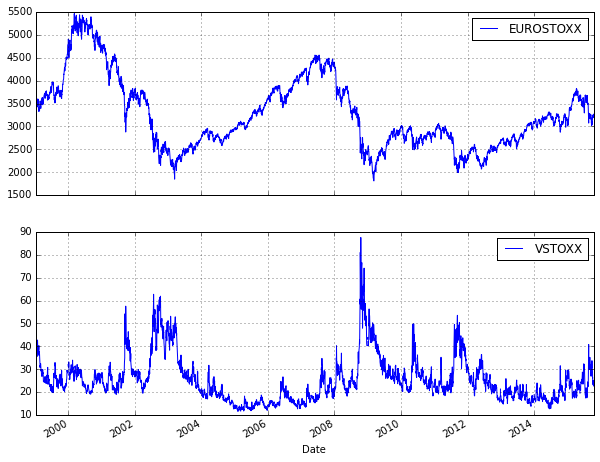

In [107]:
data.plot(subplots=True,
         figsize=(10,8),
         color='blue',
         grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x165DCF30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x16852110>]], dtype=object)

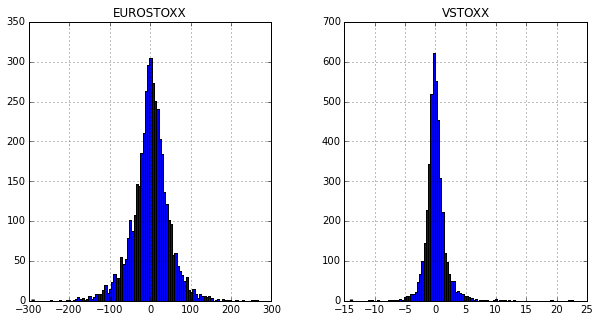

In [108]:
data.diff().hist(figsize=(10,5),color='blue', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16BC20B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x16C628B0>]], dtype=object)

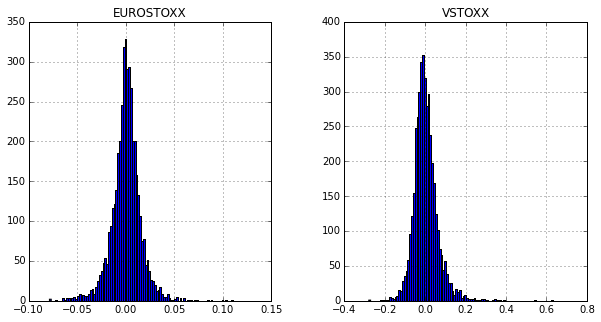

In [109]:
data.pct_change().hist(figsize=(10,5), color='blue',bins=100)

In [110]:
log_returns=np.log(data/data.shift(1)).dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x16BC2D70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x16576DD0>], dtype=object)

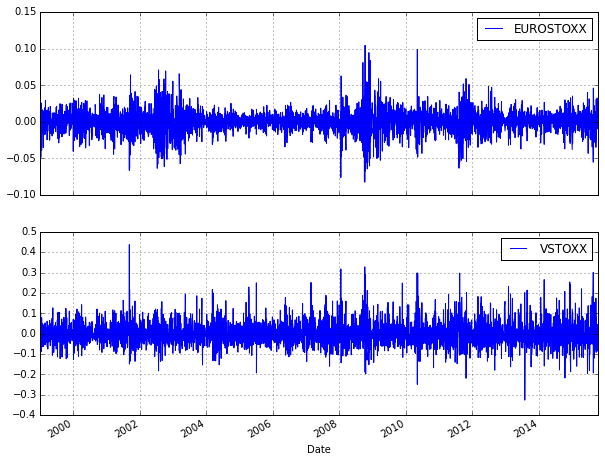

In [111]:
log_returns.plot(subplots=True,
                figsize=(10,8),
                color='blue',
                grid=True)

In [112]:
print log_returns.corr()

           EUROSTOXX    VSTOXX
EUROSTOXX   1.000000 -0.737228
VSTOXX     -0.737228  1.000000


In [113]:
import statsmodels.api as sm
import numpy as np

C:\Users\quantum\Anaconda\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


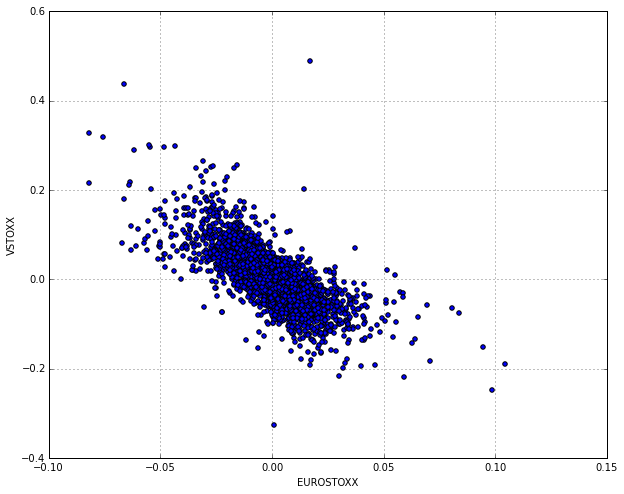

In [114]:
log_returns.plot(figsize=(10,8),
                x='EUROSTOXX',
                y='VSTOXX',
                kind='scatter')

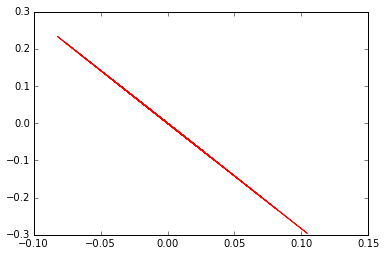

In [115]:
ols_fit=sm.OLS(log_returns['VSTOXX'].values,log_returns['EUROSTOXX'].values).fit()
plot(log_returns['EUROSTOXX'], ols_fit.fittedvalues, 'r')

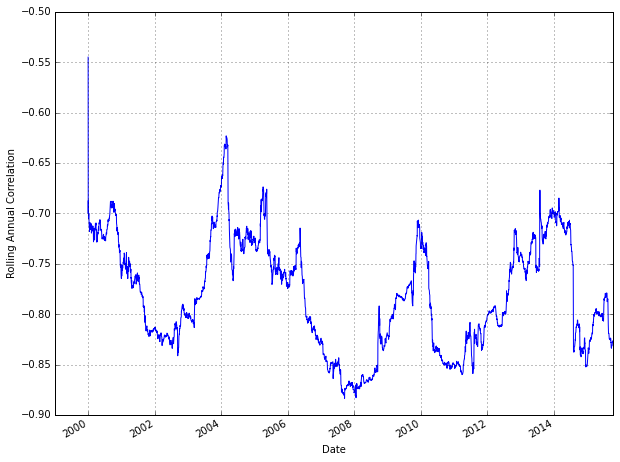

In [116]:
pd.rolling_corr(log_returns['EUROSTOXX'],
               log_returns['VSTOXX'],
               window=252).plot(figsize=(10,8))

plt.ylabel('Rolling Annual Correlation')

Regresion Analysis

In [9]:
import pandas as pd
from urllib  import urlretrieve

In [10]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'

In [13]:
urlretrieve(es_url, './es.txt')
urlretrieve(vs_url, './vs.txt')
#!ls -o ./*.txt

('./vs.txt', <httplib.HTTPMessage instance at 0x11D861C0>)

In [14]:
lines=open('es.txt','r').readlines()
lines=[line.replace(' ','') for line in lines]
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [16]:
for line in lines[3883:3890]:
    print line[41:]

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [17]:
new_file = open('es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [19]:
new_lines = open('es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [20]:
es=pd.read_csv('es50.txt',index_col=0,parse_dates=True,sep=';',dayfirst=True)

In [21]:
import numpy as np
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2015-10-12,3102,3247,362,340,426,373,9946,602,NaN
2015-10-13,3075,3221,358,337,423,369,9821,595,NaN
2015-10-14,3049,3192,356,334,419,367,9661,585,NaN
2015-10-15,3099,3239,361,339,424,372,9719,589,NaN
2015-10-16,3127,3265,363,341,427,374,9777,593,NaN


In [22]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7423 entries, 1986-12-31 00:00:00 to 2015-10-16 00:00:00
Data columns (total 8 columns):
SX5P    7423 non-null float64
SX5E    7423 non-null float64
SXXP    7423 non-null float64
SXXE    7423 non-null float64
SXXF    7423 non-null float64
SXXA    7423 non-null float64
DK5F    7423 non-null float64
DKXF    7423 non-null float64
dtypes: float64(8)

In [23]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=';'
                 , dayfirst=True, header=None, skiprows=4, names=cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2015-10-12,3102.19,3247.33,361.79,339.69,425.93,372.81,9945.76,601.98
2015-10-13,3075.40,3221.28,358.47,337.01,422.62,368.97,9821.35,595.28
2015-10-14,3048.83,3191.57,355.81,334.13,418.59,366.59,9661.11,585.17
2015-10-15,3099.14,3238.81,360.99,338.92,424.22,371.99,9719.02,588.80
2015-10-16,3127.37,3264.93,363.13,340.82,426.91,374.31,9776.67,592.98


In [24]:
vs = pd.read_csv('vs.txt', index_col=0, header=2, parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4276 entries, 1999-01-04 00:00:00 to 2015-10-16 00:00:00
Data columns (total 9 columns):
V2TX    4276 non-null float64
V6I1    3831 non-null float64
V6I2    4276 non-null float64
V6I3    4218 non-null float64
V6I4    4276 non-null float64
V6I5    4276 non-null float64
V6I6    4259 non-null float64
V6I7    4276 non-null float64
V6I8    4263 non-null float64
dtypes: float64(9)

In [25]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' : es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' : vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [26]:
data=data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4304 entries, 1999-01-04 00:00:00 to 2015-10-16 00:00:00
Data columns (total 2 columns):
EUROSTOXX    4304 non-null float64
VSTOXX       4304 non-null float64
dtypes: float64(2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1212D430>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x120EB150>], dtype=object)

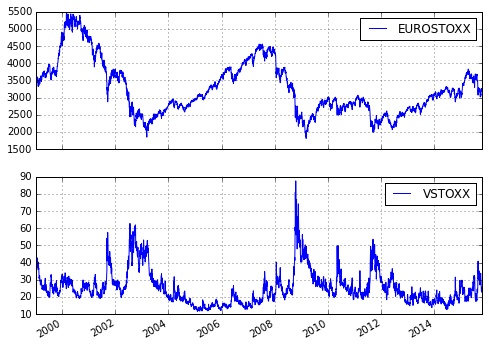

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

In [29]:
rets=np.log(data/ data.shift(1))
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12792690>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x129E0EB0>], dtype=object)

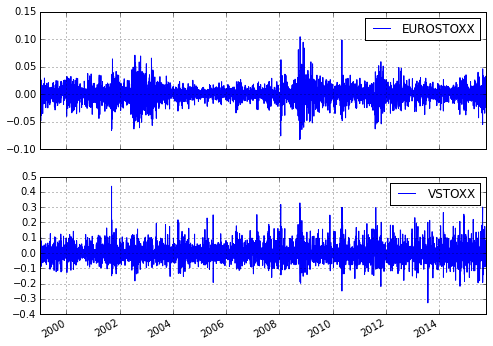

In [30]:
rets.plot(subplots=True,grid=True,style='b',figsize=(8,6))

In [31]:
xdat=rets['EUROSTOXX']
ydat=rets['VSTOXX']
model=pd.ols(y=ydat,x=xdat)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4303
Number of Degrees of Freedom:   2

R-squared:         0.5401
Adj R-squared:     0.5400

Rmse:              0.0394

F-stat (1, 4301):  5051.0656, p-value:     0.0000

Degrees of Freedom: model 1, resid 4301

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -2.8343     0.0399     -71.07     0.0000    -2.9125    -2.7562
     intercept    -0.0000     0.0006      -0.00     0.9972    -0.0012     0.0012
---------------------------------End of Summary---------------------------------

In [32]:
model.beta

x           -2.834326
intercept   -0.000002
dtype: float64

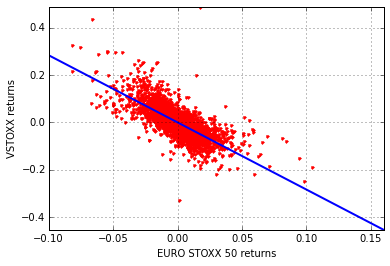

In [33]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [34]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.734916
VSTOXX,-0.734916,1.000000


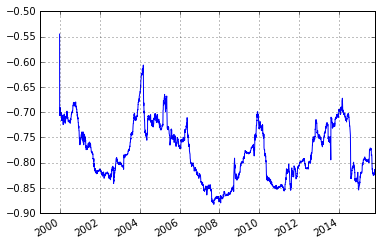

In [35]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'],
                window=252).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between EURO STOXX 50 and VSTOXX

# Implementation of the VSTOXX sub-index value
http://www.eurexchange.com/exchange-en/market-data/statistics/marketstatistics-online

In [137]:
import calendar as cal
import datetime as dt

In [138]:
class OptionUtility(object):
    def get_settlement_date(self, date):
        """ Get third friday of the month """
        day = 21 - (cal.weekday(date.year, date.month, 1) + 2) % 7
        return dt.datetime(date.year, date.month, day, 12, 0, 0)
    def get_date(self, web_date_string, date_format):
        """ Parse a date from the web to a date object """
        return dt.datetime.strptime(web_date_string, date_format)
    
    def fwd_expiry_date(self, current_dt, months_fws):
        return self.get_settlement_date( current_dt + relativedelta(months=+months_fws))

In [139]:
import math

In [140]:
class VSTOXXCalculator(object):
    
    def __init__(self):
        self.secs_per_day=float(60*60*24)
        self.secs_per_year=float(365*self.secs_per_day)
        
    def calculate_sub_index(self,df,t_cals,t_settle,r):
        T=(t_settle-t_cals).total_seconds()/self.secs_per_year
        R=math.exp(r*T)
        
        # Calculate dK
        df['dk']=0
        df['dk'][df.index[0]]=df.index[1]-df.index[-2]
        df['dk'][df.index[-1]]  =df.index[-1]-df.index[-2]
        df["dK"][df.index[1:-1]] = (df.index.values[2:]-df.index.values[:-2])/2

        # Calculate the forward price
        df["AbsDiffCP"] = abs(df["Call"]-df["Put"])
        min_val = min(df["AbsDiffCP"])
        f_df = df[df["AbsDiffCP"]==min_val]
        fwd_prices = f_df.index+R*(f_df["Call"]-f_df["Put"])
        F = np.mean(fwd_prices)
        # Get the strike not exceeding forward price
        K_i0 = df.index[df.index <= F][-1]
        # Calculate M(K(i,j))
        df["MK"] = 0
        df["MK"][df.index < K_i0] = df["Put"]
        df["MK"][K_i0] = (df["Call"][K_i0]+df["Put"][K_i0])/2.
        df["MK"][df.index > K_i0] = df["Call"]
        # Apply the variance formula to get the sub-index
        summation = sum(df["dK"]/(df.index.values**2)*R*df["MK"])
        variance = 2/T*summation-1/T*(F/float(K_i0)-1)**2
        subindex = 100*math.sqrt(variance)
        return subindex
        

In [141]:
import urllib
from lxml import html

In [142]:
class EurexWebPage(object):
    def __init__(self):
        self.url = "%s%s%s%s%s" % ("http://www.eurexchange.com/",
                                    "exchange-en/market-data/statistics/",
                                    "market-statistics-online/180102!",
                                    "onlineStats?productGroupId=846&productId=19068",
                                    "&viewType=3")
        self.param_url = "&cp=%s&month=%s&year=%s&busDate=%s"
        self.lastupdated_dateformat = "%b %d, %Y %H:%M:%S"
        self.web_date_format = "%Y%m%d"
        self.__strike_price_header__ = "Strike price"
        self.__prices_header__ = "Daily settlem. price"
        self.utility = OptionUtility()
    def get_available_dates(self):
        html_data = urllib.urlopen(self.url).read()
        webpage = html.fromstring(html_data)
        # Find the dates available on the website
        dates_listed = webpage.xpath("//select[@name='busDate']" + "/option")
        return [date_element.get("value") for date_element in reversed(dates_listed)]

    def get_date_from_web_date(self, web_date):
        return self.utility.get_date(web_date,self.web_date_format)
   
    def get_option_series_data(self, is_call, current_dt, option_dt):
        selected_date = current_dt.strftime(self.web_date_format)
        option_type = "Call" if is_call else "Put"
        target_url = (self.url 
                      + self.param_url) %(option_type, 
                                          option_dt.month, 
                                          option_dt.year,
                                          selected_date)
        html_data = urllib.urlopen(target_url).read()
        webpage = html.fromstring(html_data)
        update_date = self.get_last_update_date(webpage)
        indexes = self.get_data_headers_indexes(webpage)
        data = self.__get_data_rows__(webpage,indexes, option_type)
        return data, update_date
    
    def __get_data_rows__(self, webpage, indexes, header):
        data = pd.DataFrame()
        for row in webpage.xpath("//table[@class='dataTable']/" + "tbody/tr"):
            columns = row.xpath("./td")
            if len(columns) > max(indexes):
                try:
                    [K, price] = [float(columns[i].text.replace(",","")) for i in indexes]
                    data.set_value(K, header, price)
                except:
                    continue
        return data
    
    def get_data_headers_indexes(self, webpage):
        table_headers = webpage.xpath(
        "//table[@class='dataTable']" + "/thead/th/text()")
        indexes_of_interest = [
                                table_headers.index(
                                self.__strike_price_header__),
                                table_headers.index(
                                self.__prices_header__)]
        return indexes_of_interest
    
    def get_last_update_date(self, webpage):
        return dt.datetime.strptime(webpage.xpath("//p[@class='date']/b")
                                    [-1].text,self.lastupdated_dateformat)

In [143]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import numpy as np
import thread

In [144]:
class VSTOXXSubIndex:
    def __init__(self, path_to_subindexes):
        self.sub_index_store_path = path_to_subindexes
        self.utility = OptionUtility()
        self.webpage = EurexWebPage()
        self.calculator = VSTOXXCalculator()
        self.csv_date_format = "%m/%d/%Y"
    def start(self, months=2, r=0.015):
        # For each date available, fetch the data
        for selected_date in self.webpage.get_available_dates():
            print "Collecting historical data for %s..." % selected_date
            self.calculate_and_save_sub_indexes(   selected_date, months, r)
        print "Completed."
    def calculate_and_save_sub_indexes(self, selected_date, months_fwd, r):
        current_dt = self.webpage.get_date_from_web_date(selected_date)
        for i in range(1, months_fwd+1):
            # Get settlement date of the expiring month
            expiry_dt = self.utility.fwd_expiry_date(current_dt, i)
            
            # Get calls and puts of expiring month
            dataset, update_dt = self.get_data(current_dt,  expiry_dt)
            if not dataset.empty:
                sub_index = self.calculator.calculate_sub_index(dataset, update_dt, expiry_dt, r)
                self.save_vstoxx_sub_index_to_csv( current_dt, sub_index, i)
    
    def save_vstoxx_sub_index_to_csv(self, current_dt,sub_index, month):
        subindex_df = None
        try:
            subindex_df = pd.read_csv(self.sub_index_store_path,index_col=[0])
        except:
            subindex_df = pd.DataFrame()
            display_date = current_dt.strftime(self.csv_date_format)
            subindex_df.set_value(display_date, "I" + str(month),sub_index)
            subindex_df.to_csv(self.sub_index_store_path)
        
    def get_data(self, current_dt, expiry_dt):
        """ Fetch and join calls and puts option series data """
        calls, dt1 = self.webpage.get_option_series_data(True, current_dt, expiry_dt)
        puts, dt2 = self.webpage.get_option_series_data( False, current_dt, expiry_dt)
        option_series = calls.join(puts, how='inner')
        if dt1 != dt2:
            print "Error: 2 different underlying prices."
        return option_series, dt1

In [150]:
vstoxx_subindex = VSTOXXSubIndex(
                        'C:\Users\quantum\Documents\my-routine/vstoxx_sub_indexes.csv')
vstoxx_subindex.start()

Completed.


In [151]:
#Analyzing the results
import pandas as pd
vstoxx_sub_indexes=pd.read_csv('C:\Users\quantum\Documents\my-routine/vstoxx_sub_indexes.csv'
                              ,index_col=[0],parse_dates=True,dayfirst=False)
vstoxx=pd.read_csv('C:\Users\quantum\Documents\my-routine/vstoxx.csv',
                                index_col=[0],
                                parse_dates=True, dayfirst=False)
vstoxx = pd.read_csv('C:\Users\quantum\Documents\my-routine/vstoxx.csv'
                     , index_col=[0],parse_dates=True, dayfirst=False)
start_dt = min(vstoxx_sub_indexes.index.values)
vstoxx = vstoxx[vstoxx.index >= start_dt]
from pylab import *
new_pd = pd.DataFrame(vstoxx_sub_indexes["I2"])
new_pd = new_pd.join(vstoxx["V6I2"], how='inner')
new_pd.plot(figsize=(10, 6), grid=True)

IOError: File C:\Users\quantum\Documents\my-routine/vstoxx_sub_indexes.csv does not exist

Forex trading with OANDA API

In [1]:
account_id=9698734
key='7456a066848a09e405aed7c56d4b5555-50dd5b9b5167a0b7a44cf0e0fbd8ace2'

In [2]:
import oandapy

In [3]:
oanda = oandapy.API(environment="practice", access_token=key)
response = oanda.get_prices(instruments="EUR_USD")
print response

{u'prices': [{u'ask': 1.13545, u'instrument': u'EUR_USD', u'bid': 1.13429, u'status': u'halted', u'time': u'2015-10-16T20:59:58.558295Z'}]}


In [4]:
prices = response["prices"]
bidding_price = float(prices[0]["bid"])
asking_price = float(prices[0]["ask"])
instrument = prices[0]["instrument"]
time = prices[0]["time"]
'''We can output each variable to ensure that we have parsed the dictionary data
correctly'''
print "[%s] %s bid=%s ask=%s" % (time, instrument, bidding_price, asking_price)

[2015-10-16T20:59:58.558295Z] EUR_USD bid=1.13429 ask=1.13545


Send an order 

In [5]:
'''
from datetime import datetime, timedelta
 # set the trade to expire after one day
trade_expire = datetime.now() + timedelta(days=1)
trade_expire = trade_expire.isoformat("T") + "Z"
response = oanda.create_order(account_id,instrument="EUR_USD", units=1000, side="sell"
                              ,type="limit",price=1.105, expiry=trade_expire)

print response
'''

'\nfrom datetime import datetime, timedelta\n # set the trade to expire after one day\ntrade_expire = datetime.now() + timedelta(days=1)\ntrade_expire = trade_expire.isoformat("T") + "Z"\nresponse = oanda.create_order(account_id,instrument="EUR_USD", units=1000, side="sell"\n                              ,type="limit",price=1.105, expiry=trade_expire)\n\nprint response\n'

Building a trend-following forex trading platform

In [ ]:
"""Implementing the trend-following algorithm for trading foreign currencies"""
import oandapy
from datetime import datetime
import pandas as pd

class ForexSystem(oandapy.Streamer):
    def __init__(self, *args, **kwargs):
        oandapy.Streamer.__init__(self, *args, **kwargs)
        self.oanda = oandapy.API(kwargs["environment"],
                                 kwargs["access_token"])

        self.instrument = None
        self.account_id = None
        self.qty = 0
        self.resample_interval = '10s'
        self.mean_period_short = 5
        self.mean_period_long = 20
        self.buy_threshold = 1.0
        self.sell_threshold = 1.0

        self.prices = pd.DataFrame()
        self.beta = 0
        self.is_position_opened = False
        self.opening_price = 0
        self.executed_price = 0
        self.unrealized_pnl = 0
        self.realized_pnl = 0
        self.position = 0
        self.dt_format = "%Y-%m-%dT%H:%M:%S.%fZ"

    def begin(self, **params):
        self.instrument = params["instruments"]
        self.account_id = params["accountId"]
        self.qty = params["qty"]
        self.resample_interval = params["resample_interval"]
        self.mean_period_short = params["mean_period_short"]
        self.mean_period_long = params["mean_period_long"]
        self.buy_threshold = params["buy_threshold"]
        self.sell_threshold = params["sell_threshold"]

        self.start(**params)  # Start streaming prices

    def on_success(self, data):
        time, symbol, bid, ask = self.parse_tick_data(
            data["tick"])
        self.tick_event(time, symbol, bid, ask)

    def parse_tick_data(self, dict_data):
        time = datetime.strptime(dict_data["time"],
                                 self.dt_format)
        ask = float(dict_data["ask"])
        bid = float(dict_data["bid"])
        instrument = dict_data["instrument"]
        return time, instrument, bid, ask

    def tick_event(self, time, symbol, bid, ask):
        midprice = (ask+bid)/2.
        self.prices.loc[time, symbol] = midprice

        resampled_prices = self.prices.resample(
            self.resample_interval,
            how='last',
            fill_method="ffill")

        mean_short = resampled_prices.tail(
            self.mean_period_short).mean()[0]
        mean_long = resampled_prices.tail(
            self.mean_period_long).mean()[0]
        self.beta = mean_short / mean_long

        self.perform_trade_logic(self.beta)
        self.calculate_unrealized_pnl(bid, ask)
        self.print_status()

    def perform_trade_logic(self, beta):

        if beta > self.buy_threshold:
            if not self.is_position_opened \
                    or self.position < 0:
                self.check_and_send_order(True)

        elif beta < self.sell_threshold:
            if not self.is_position_opened \
                    or self.position > 0:
                self.check_and_send_order(False)

    def check_and_send_order(self, is_buy):
        if self.place_market_order(self.qty, is_buy):
            # Update position upon successful order
            if is_buy:
                self.position += self.qty
            else:
                self.position -= self.qty

            if self.position == 0:
                self.is_position_opened = False
                self.calculate_realized_pnl(is_buy)
            else:
                self.opening_price = self.executed_price
                self.is_position_opened = True

    def calculate_realized_pnl(self, is_buy):
        self.realized_pnl += self.qty * (
            (self.opening_price - self.executed_price)
            if is_buy else
            (self.executed_price - self.opening_price))

    def calculate_unrealized_pnl(self, bid, ask):
        if self.is_position_opened:
            # Retrieve position from server
            pos = self.oanda.get_position(self.account_id,
                                          self.instrument)
            units = pos["units"]
            side = pos["side"]
            avg_price = float(pos["avgPrice"])

            self.unrealized_pnl = units * (
                (bid - avg_price)
                if (side == "buy")
                else (avg_price - ask))
        else:
            self.unrealized_pnl = 0

    def place_market_order(self, qty, is_buy):
        side = "buy" if is_buy else "sell"
        response = self.oanda.create_order(
            account_id,
            instrument=self.instrument,
            units=qty,
            side=side,
            type='market')

        if response is not None:
            self.executed_price = float(response["price"])
            print "Placed order %s %s %s at market." % (side, qty, self.instrument)
            return True  # Order is successful

        return False  # Order is unsuccessful

    def print_status(self):
        print "[%s] %s pos=%s beta=%s RPnL=%s UPnL=%s" % (
            datetime.now().time(),
            self.instrument,
            self.position,
            round(self.beta, 5),
            self.realized_pnl,
            self.unrealized_pnl)

    def on_error(self, data):
        print data
        self.disconnect()

if __name__ == "__main__":
    key = " 7456a066848a09e405aed7c56d4b5555-50dd5b9b5167a0b7a44cf0e0fbd8ace2"
    account_id = 9698734
    system = ForexSystem(environment="practice", access_token=key)
    system.begin(accountId=account_id,
                 instruments="EUR_USD",
                 qty=1000,
                 resample_interval="10s",
                 mean_period_short=5,
                 mean_period_long=20,
                 buy_threshold=1.,
                 sell_threshold=1.)        

VaR for risk management

In [ ]:
import datetime as dt
import numpy as np
import pandas.io.data as rda
from scipy.stats import norm

def calculate_daily_VaR(P, prob, mean, sigma,days_per_year=252.):
    min_ret = norm.ppf(1-prob,
    mean/days_per_year,
    sigma/np.sqrt(days_per_year))
    return P - P*(min_ret+1)

if __name__ == "__main__":
    start = dt.datetime(2013, 12, 1)
    end = dt.datetime(2014, 12, 1)
    prices = rda.DataReader("AAPL", "yahoo", start, end)
    returns = prices["Adj Close"].pct_change().dropna()
    portvolio_value = 100000000.00
    confidence = 0.95
    mu = np.mean(returns)
    sigma = np.std(returns)
    VaR = calculate_daily_VaR(portvolio_value, confidence,
    mu, sigma)
    
print "Value-at-Risk:", round(VaR, 2)